In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
%matplotlib inline

In [36]:
#read csv for model 1
df = pd.read_csv('df_model_one_.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   totalyearlycompensation       18483 non-null  int64  
 1   yearsofexperience             18483 non-null  float64
 2   yearsatcompany                18483 non-null  float64
 3   is_female                     18483 non-null  int64  
 4   is_faang                      18483 non-null  int64  
 5   education_enc                 18483 non-null  float64
 6   Data Scientist                18483 non-null  int64  
 7   Hardware Engineer             18483 non-null  int64  
 8   Mechanical Engineer           18483 non-null  int64  
 9   Product Designer              18483 non-null  int64  
 10  Product Manager               18483 non-null  int64  
 11  Software Engineer             18483 non-null  int64  
 12  Software Engineering Manager  18483 non-null  int64  
 13  S

In [37]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,is_female,is_faang,education_enc,Data Scientist,Hardware Engineer,Mechanical Engineer,Product Designer,Product Manager,Software Engineer,Software Engineering Manager,Solution Architect,Technical Program Manager
count,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000
mean,207508.629551,6.010685,2.128147,0.189147,0.281340,2.612725,0.052859,0.045014,0.012985,0.032408,0.079965,0.678678,0.033220,0.015961,0.028675
std,83974.695308,4.746126,2.174891,0.391636,0.449665,0.652461,0.223759,0.207341,0.113212,0.177086,0.271247,0.466997,0.179215,0.125326,0.166896
min,15000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148000.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,192000.000000,5.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,254000.000000,9.000000,3.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,462000.000000,20.000000,9.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


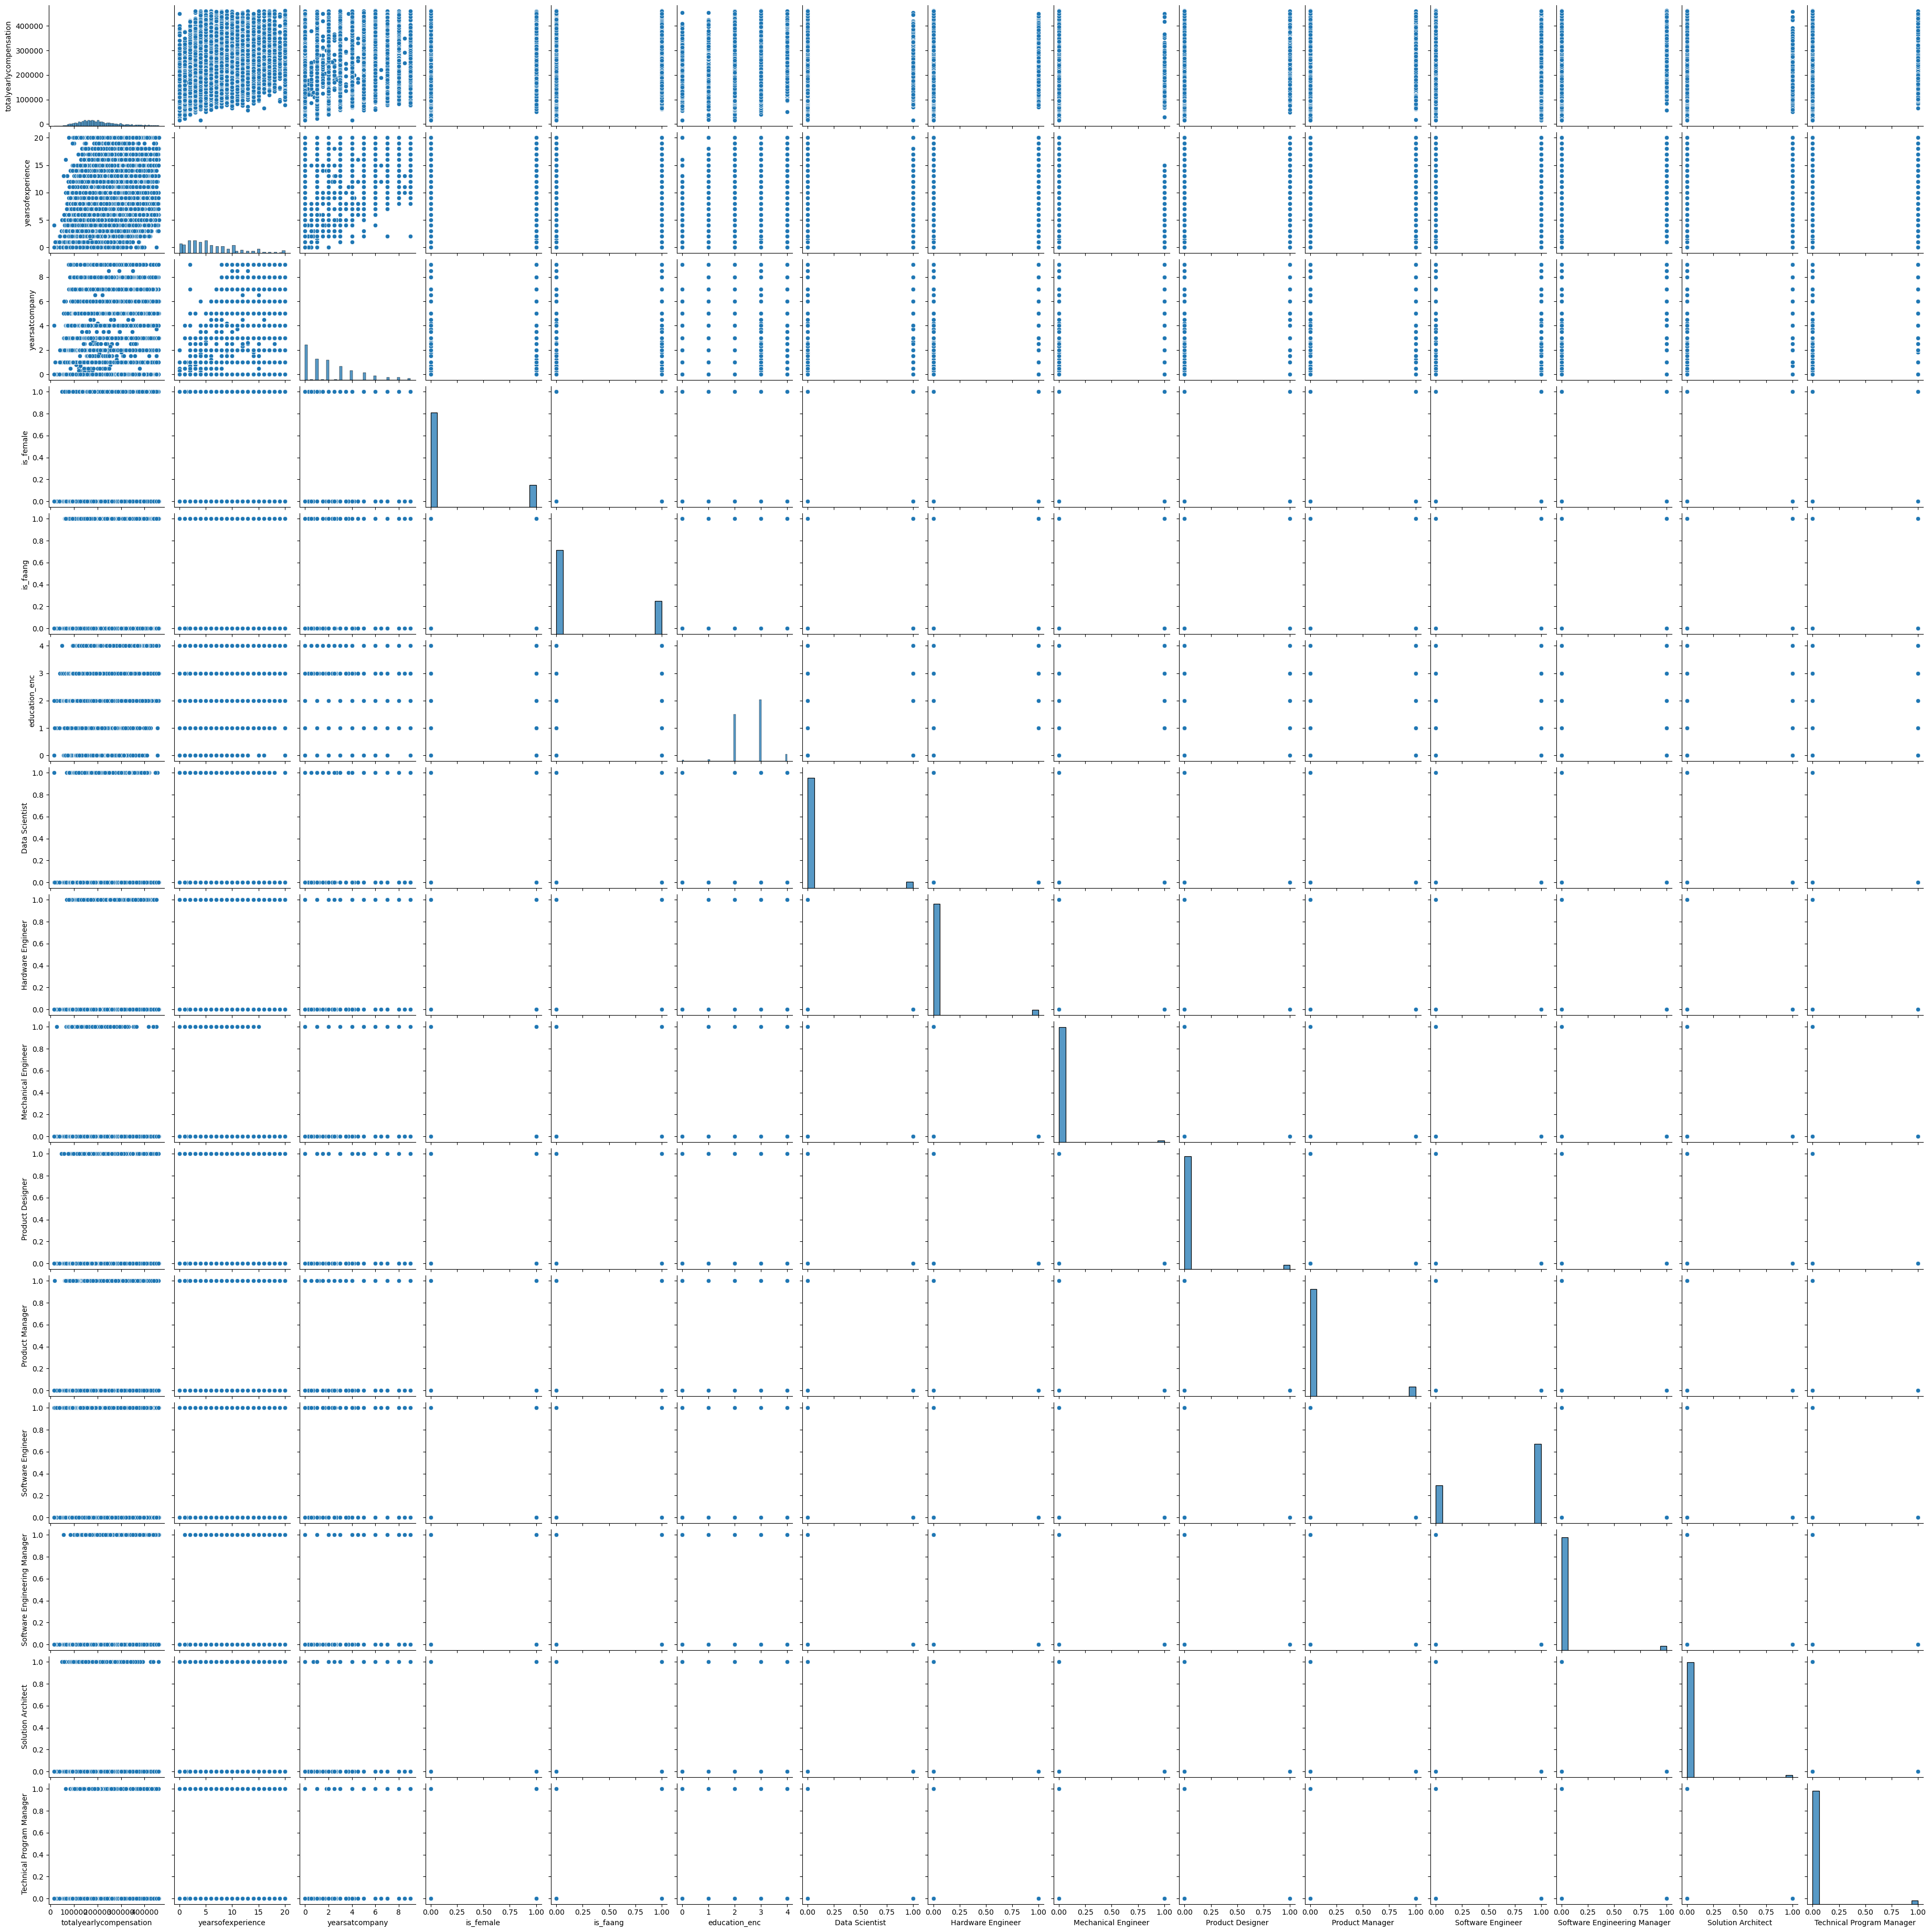

In [38]:
sns.pairplot(df)

In [39]:
##X-Y split
X = df.drop('totalyearlycompensation', axis = 1)
y = df['totalyearlycompensation']

In [40]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [41]:
#OLS - no transformation
X_train_const = sm.add_constant(X_train.to_numpy()) #add a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test.to_numpy()) #add a constant
predictions_test = model.predict(X_test_const)

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.359
Model:                                 OLS   Adj. R-squared:                  0.358
Method:                      Least Squares   F-statistic:                     517.3
Date:                     Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                             11:31:07   Log-Likelihood:            -1.6217e+05
No. Observations:                    12938   AIC:                         3.244e+05
Df Residuals:                        12923   BIC:                         3.245e+05
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [42]:
#OLS - with transformation (POWER TRANSFORMER) first
pt = PowerTransformer()

In [43]:
#Fit & Transform on X_train
ct = ColumnTransformer([("pt", pt, list(X.columns))],
                        remainder='drop',verbose_feature_names_out=True,verbose=True).fit(X_train)
X_train_ct = pd.DataFrame(ct.transform(X_train),columns=ct.get_feature_names_out())

#just transform on X_test
X_test_ct = pd.DataFrame(ct.transform(X_test),columns=ct.get_feature_names_out())

[ColumnTransformer] ............ (1 of 1) Processing pt, total=   0.1s


In [44]:
X_train_const_ct = sm.add_constant(X_train_ct.to_numpy()) #add a constant

model = sm.OLS(y_train, X_train_const_ct).fit()
prediction_trains = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test_ct.to_numpy())
prediction_tests = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.382
Model:                                 OLS   Adj. R-squared:                  0.381
Method:                      Least Squares   F-statistic:                     570.4
Date:                     Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                             11:31:49   Log-Likelihood:            -1.6194e+05
No. Observations:                    12938   AIC:                         3.239e+05
Df Residuals:                        12923   BIC:                         3.240e+05
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

### Model 2

In [45]:
#read csv for model 2 (including location)
df= pd.read_csv('df_model_two_.csv')

In [46]:
##X-Y split
X = df.drop('totalyearlycompensation', axis = 1)
y = df['totalyearlycompensation']

In [47]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [48]:
#OLS - no transformation
X_train_const = sm.add_constant(X_train.to_numpy()) #add a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test.to_numpy()) #add a constant
predictions_test = model.predict(X_test_const)

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.468
Model:                                 OLS   Adj. R-squared:                  0.466
Method:                      Least Squares   F-statistic:                     189.0
Date:                     Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                             11:41:59   Log-Likelihood:            -1.6096e+05
No. Observations:                    12938   AIC:                         3.221e+05
Df Residuals:                        12877   BIC:                         3.225e+05
Df Model:                               60                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [5]:
#OLS - with transformation first
pt = PowerTransformer()

In [6]:
#Fit & Transform on X_train
ct = ColumnTransformer([("pt", pt, list(X.columns))],
                        remainder='drop',verbose_feature_names_out=True,verbose=True).fit(X_train)
X_train_ct = pd.DataFrame(ct.transform(X_train),columns=ct.get_feature_names_out())

#just transform on X_test
X_test_ct = pd.DataFrame(ct.transform(X_test),columns=ct.get_feature_names_out())

/Users/juliettedegoul/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[ColumnTransformer] ............ (1 of 1) Processing pt, total=   0.6s


In [7]:
#OLS
X_train_const_ct = sm.add_constant(X_train_ct.to_numpy()) #add a constant

model = sm.OLS(y_train, X_train_const_ct).fit()
prediction_trains = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test_ct.to_numpy(), has_constant='add')

prediction_tests = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.432
Model:                                 OLS   Adj. R-squared:                  0.430
Method:                      Least Squares   F-statistic:                     180.0
Date:                     Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                             14:49:35   Log-Likelihood:            -1.8646e+05
No. Observations:                    14490   AIC:                         3.730e+05
Df Residuals:                        14428   BIC:                         3.735e+05
Df Model:                               61                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [4]:
#let's keep only the states that seem to have an actual impact (CA, MA, NY, WA)
keep_cols = list(range(15)) + [17, 32, 47, 59]

df_new = df.iloc[:, keep_cols]
df_new = df_new.drop(columns=['Mechanical Engineer'])


In [51]:
df_new.to_csv('df_model_three.csv', index=False)

In [147]:
df = pd.read_csv('df_model_threee.csv')
df

,totalyearlycompensation,yearsofexperience,yearsatcompany,is_female,is_faang,education_enc,Data Scientist,Hardware Engineer,Mechanical Engineer,Product Designer,Product Manager,Software Engineer,Software Engineering Manager,Solution Architect,Technical Program Manager,CA,MA,NY,WA
0,125000,1.0,0.0,0,0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,170000,0.0,0.0,0,0,3.0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,332000,1.0,0.0,0,1,4.0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,240000,3.0,3.0,1,1,4.0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,310000,25.0,9.0,0,0,4.0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19643,127000,2.0,0.0,0,0,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0
19644,92000,2.0,2.0,0,0,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0
19645,95000,3.0,3.0,0,0,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0
19646,241000,9.0,0.0,1,1,2.0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [148]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,is_female,is_faang,education_enc,Data Scientist,Hardware Engineer,Mechanical Engineer,Product Designer,Product Manager,Software Engineer,Software Engineering Manager,Solution Architect,Technical Program Manager,CA,MA,NY,WA
count,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000
mean,209960.962948,6.775982,2.674550,0.185871,0.272445,2.610546,0.050998,0.047588,0.013080,0.030996,0.080517,0.664902,0.041378,0.017915,0.032675,0.399735,0.036289,0.089882,0.218801
std,84848.951584,5.725718,3.324166,0.389013,0.445229,0.654566,0.219998,0.212897,0.113621,0.173310,0.272099,0.472037,0.199169,0.132647,0.177789,0.489856,0.187012,0.286020,0.413444
min,15000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150000.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,195000.000000,5.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,259000.000000,10.000000,4.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,462000.000000,45.000000,40.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='totalyearlycompensation', ylabel='Count'>

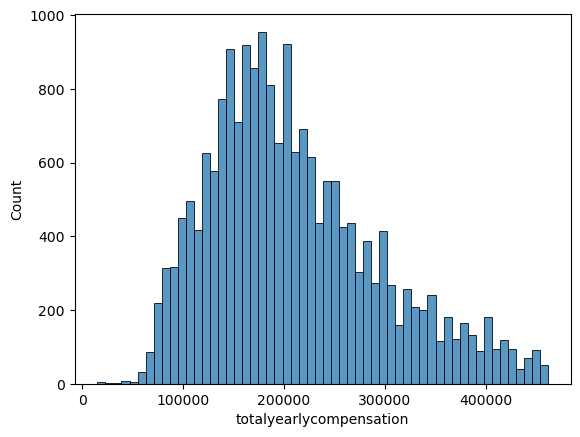

In [149]:
sns.histplot(df, x='totalyearlycompensation')

In [150]:
#log the target variable
df['totalyearlycompensation'] = np.log(df['totalyearlycompensation'])
df['totalyearlycompensation']

0        11.736069
1        12.043554
2        12.712890
3        12.388394
4        12.644328
           ...    
19643    11.751942
19644    11.429544
19645    11.461632
19646    12.392552
19647    12.611538
Name: totalyearlycompensation, Length: 19648, dtype: float64

<AxesSubplot:xlabel='totalyearlycompensation', ylabel='Count'>

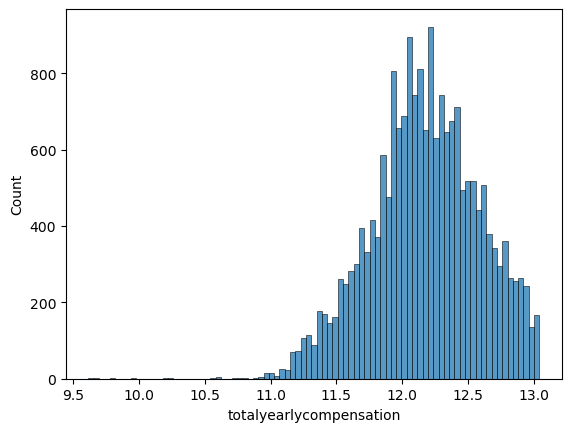

In [151]:
sns.histplot(df, x='totalyearlycompensation')

In [152]:
df.head(10)

,totalyearlycompensation,yearsofexperience,yearsatcompany,is_female,is_faang,education_enc,Data Scientist,Hardware Engineer,Mechanical Engineer,Product Designer,Product Manager,Software Engineer,Software Engineering Manager,Solution Architect,Technical Program Manager,CA,MA,NY,WA
0,11.736069,1.0,0.0,0,0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,12.043554,0.0,0.0,0,0,3.0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,12.712890,1.0,0.0,0,1,4.0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,12.388394,3.0,3.0,1,1,4.0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,12.644328,25.0,9.0,0,0,4.0,0,0,0,0,0,1,0,0,0,1,0,0,0
5,11.561716,2.0,0.0,0,0,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,12.206073,0.0,0.0,1,1,4.0,0,0,0,0,0,1,0,0,0,1,0,0,0
7,12.138864,1.0,1.0,0,1,4.0,0,1,0,0,0,0,0,0,0,1,0,0,0
8,12.634603,3.0,0.0,0,1,4.0,0,0,0,0,0,1,0,0,0,1,0,0,0
9,12.031719,2.0,2.0,0,0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [153]:
##X-Y split
X = df.drop('totalyearlycompensation', axis = 1)
y = df['totalyearlycompensation']

In [154]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [155]:
#OLS - 
X_train_const = sm.add_constant(X_train.to_numpy()) #add a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test.to_numpy()) #add a constant
predictions_test = model.predict(X_test_const)

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.490
Model:                                 OLS   Adj. R-squared:                  0.490
Method:                      Least Squares   F-statistic:                     734.4
Date:                     Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                             14:37:49   Log-Likelihood:                -2693.1
No. Observations:                    13753   AIC:                             5424.
Df Residuals:                        13734   BIC:                             5567.
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

Only the dependent/response variable is log-transformed. Exponentiate the coefficient, subtract one from this number, and multiply by 100. This gives the percent increase (or decrease) in the response for every one-unit increase in the independent variable. Example: the coefficient is 0.198. (exp(0.198) – 1) * 100 = 21.9. For every one-unit increase in the independent variable, our dependent variable increases by about 22%.

In [123]:
percent = (math.exp( -0.0384)-1)*100
percent

-3.7672067278389565

In [156]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test

,totalyearlycompensation
0,12.128111
1,12.031719
2,12.358794
3,11.911702
4,12.706848
...,...
5890,11.635143
5891,12.144197
5892,12.072541
5893,12.425208


In [157]:
y_pred = pd.DataFrame(predictions_test)
y_pred

,0
0,12.628580
1,12.010099
2,12.279986
3,12.024155
4,12.368021
...,...
5890,12.024191
5891,12.563826
5892,12.234466
5893,12.248851


In [158]:
result=pd.DataFrame({"y_test": y_test["totalyearlycompensation"],"y_pred": y_pred[0]})
result

,y_test,y_pred
0,12.128111,12.628580
1,12.031719,12.010099
2,12.358794,12.279986
3,11.911702,12.024155
4,12.706848,12.368021
...,...,...
5890,11.635143,12.024191
5891,12.144197,12.563826
5892,12.072541,12.234466
5893,12.425208,12.248851


<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

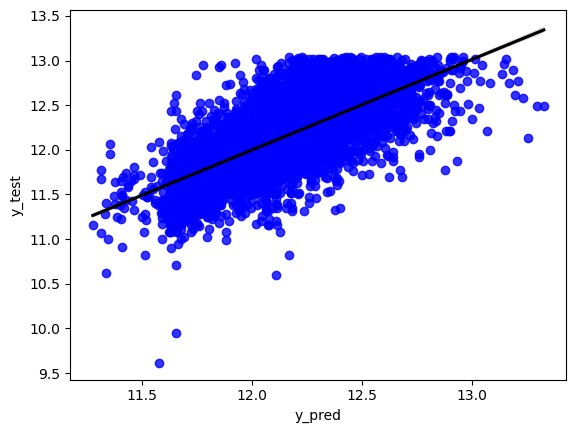

In [159]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A straight line
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "blue"}, line_kws={"color": "black"})

In [160]:
result["residuals"] = result["y_test"] - result["y_pred"]

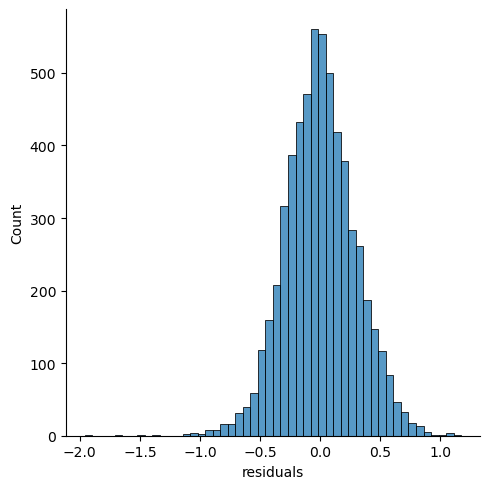

In [161]:
# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
sns.displot(result["residuals"], bins=50, kde=False)

<AxesSubplot:xlabel='y_pred', ylabel='residuals'>

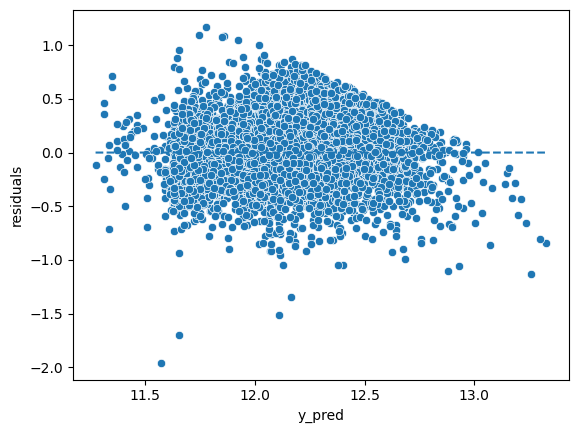

In [162]:
sns.scatterplot(x="y_pred", y="residuals", data=result)
sns.lineplot(x=result["y_pred"], y=np.zeros(len(result)), linestyle='dashed')